In [1]:
import illustris_python as il

In [2]:
import numpy as np

In [5]:
import requests

In [6]:
baseUrl = "https://www.tng-project.org/api/"

In [7]:
headers = {"api-key":"5484c6c24f106178fd66213717ad592d"}

In [44]:
def get(path,params=None):
    r = requests.get(path,params=params,headers=headers)

    r.raise_for_status()

    if r.headers['content-type']=='application/json':
        return r.json()

    if 'content-disposition' in r.headers:
        filename = r.headers['content-disposition'].split('filename=')[1]
        with open(filename,'wb') as f:
            f.write(r.content)
        return filename
    return r

In [9]:
r = get(baseUrl)

In [10]:
r.keys()

dict_keys(['simulations'])

In [11]:
len(r['simulations'])

65

In [12]:
r['simulations'][0]

{'name': 'Illustris-1',
 'num_snapshots': 134,
 'url': 'http://www.tng-project.org/api/Illustris-1/'}

In [13]:
names = [sim['name'] for sim in r['simulations']]

In [14]:
names

['Illustris-1',
 'Illustris-1-Dark',
 'Illustris-2',
 'Illustris-2-Dark',
 'Illustris-3',
 'Illustris-3-Dark',
 'TNG100-1',
 'TNG100-1-Dark',
 'TNG100-2',
 'TNG100-2-Dark',
 'TNG100-3',
 'TNG100-3-Dark',
 'TNG300-3',
 'TNG300-2-Dark',
 'TNG300-2',
 'TNG300-1-Dark',
 'TNG300-1',
 'TNG300-3-Dark',
 'TNG50-1',
 'TNG50-1-Dark',
 'TNG50-2',
 'TNG50-2-Dark',
 'TNG50-3',
 'TNG50-3-Dark',
 'TNG50-4',
 'TNG50-4-Dark',
 'Illustris-1-Subbox0',
 'Illustris-1-Subbox1',
 'Illustris-1-Subbox2',
 'Illustris-1-Subbox3',
 'Illustris-2-Subbox0',
 'Illustris-2-Subbox1',
 'Illustris-2-Subbox2',
 'Illustris-2-Subbox3',
 'Illustris-3-Subbox0',
 'Illustris-3-Subbox1',
 'Illustris-3-Subbox2',
 'Illustris-3-Subbox3',
 'TNG100-1-Subbox0',
 'TNG100-1-Subbox1',
 'TNG100-2-Subbox0',
 'TNG100-2-Subbox1',
 'TNG100-3-Subbox0',
 'TNG100-3-Subbox1',
 'TNG300-3-Subbox1',
 'TNG300-3-Subbox2',
 'TNG300-3-Subbox0',
 'TNG300-2-Subbox1',
 'TNG300-2-Subbox2',
 'TNG300-2-Subbox0',
 'TNG300-1-Subbox1',
 'TNG300-1-Subbox2',
 'TNG

In [15]:
i = names.index('TNG100-1')
i

6

In [16]:
sim = get(r['simulations'][i]['url'])
sim.keys()

dict_keys(['name', 'description', 'name_alt', 'boxsize', 'z_start', 'z_final', 'cosmology', 'omega_0', 'omega_L', 'omega_B', 'hubble', 'physics_model', 'has_cooling', 'has_starformation', 'has_winds', 'has_blackholes', 'mass_gas', 'mass_dm', 'softening_dm_comoving', 'softening_stars_comoving', 'softening_blackholes_comoving', 'softening_gas_comoving', 'softening_dm_max_phys', 'softening_stars_max_phys', 'softening_blackholes_max_phys', 'softening_gas_max_phys', 'softening_gas_factor', 'softening_gas_comoving_min', 'num_dm', 'num_tr_mc', 'num_tr_vel', 'longids', 'is_uniform', 'is_zoom', 'is_subbox', 'num_files_snapshot', 'num_files_groupcat', 'num_files_rockstar', 'num_files_lhalotree', 'num_files_sublink', 'num_files_ctrees', 'filesize_lhalotree', 'filesize_sublink', 'filesize_ctrees', 'filesize_ics', 'filesize_simulation', 'has_fof', 'has_subfind', 'has_rockstar', 'has_lhalotree', 'has_sublink', 'has_ctrees', 'permission_required', 'num_snapshots', 'url', 'parent_simulation', 'child_s

In [17]:
sim["num_dm"]

6028568000

In [18]:
sim['snapshots']

'http://www.tng-project.org/api/TNG100-1/snapshots/'

In [19]:
snaps = get(sim['snapshots'])

In [20]:
len(snaps)

100

In [21]:
snaps[-1]

{'number': 99,
 'redshift': 2.22044604925031e-16,
 'num_groups_subfind': 4371211,
 'url': 'http://www.tng-project.org/api/TNG100-1/snapshots/99/'}

In [22]:
snap = get(snaps[-1]['url'])

snap

{'simulation': 'http://www.tng-project.org/api/TNG100-1/',
 'number': 99,
 'redshift': 2.22044604925031e-16,
 'num_gas': 5453610043,
 'num_dm': 6028568000,
 'num_trmc': 12057136000,
 'num_stars': 453723346,
 'num_bhs': 37053,
 'num_groups_fof': 6291349,
 'num_groups_subfind': 4371211,
 'num_groups_rockstar': 0,
 'filesize_snapshot': 1852107755772.0,
 'filesize_groupcat': 4446214808.0,
 'filesize_rockstar': 0.0,
 'url': 'http://www.tng-project.org/api/TNG100-1/snapshots/99/',
 'subhalos': 'http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/',
 'vis': {'groupcat_sfms': 'http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/plot.png?xQuant=mstar2_log&yQuant=ssfr&xlim=9.0%2C11.0',
  'groupcat_sizemass': 'http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/plot.png?xQuant=mstar2_log&yQuant=size_stars',
  'groupcat_mz_gas': 'http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/plot.png?xQuant=mstar2_log&yQuant=Z_gas',
  'groupcat_mz_stars': 'http://www.t

In [23]:
subs = get(snap['subhalos'])

In [25]:
subs.keys()

dict_keys(['count', 'next', 'previous', 'results'])

In [26]:
subs['count']

4371211

In [30]:
subs = get(snap['subhalos'],{'limit':200})
len(subs['results'])

200

In [31]:
subs['results'][-2]

{'id': 198,
 'sfr': 0.169707,
 'mass_log_msun': 10.813072128034076,
 'url': 'http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/198/'}

In [32]:
sub = get(subs['results'][-2]['url'])

In [33]:
sub

{'snap': 99,
 'id': 198,
 'bhmdot': 1.10071e-05,
 'cm_x': 1646.42,
 'cm_y': 26141.4,
 'cm_z': 18387.8,
 'gasmetallicity': 0.00995366,
 'gasmetallicityhalfrad': 0.0114245,
 'gasmetallicitymaxrad': 0.00415671,
 'gasmetallicitysfr': 0.00920035,
 'gasmetallicitysfrweighted': 0.0106624,
 'pos_x': 1646.01,
 'pos_y': 26143.0,
 'pos_z': 18387.6,
 'halfmassrad': 21.3035,
 'halfmassrad_gas': 4.5932,
 'halfmassrad_dm': 21.9658,
 'halfmassrad_stars': 0.658,
 'halfmassrad_bhs': 0.0,
 'len': 9715,
 'len_gas': 881,
 'len_dm': 8466,
 'len_stars': 367,
 'len_bhs': 1,
 'mass': 4.40471,
 'mass_gas': 0.099653,
 'mass_dm': 4.28019,
 'mass_stars': 0.024722,
 'mass_bhs': 0.000144,
 'massinhalfrad': 0.041025,
 'massinhalfrad_gas': 0.008837,
 'massinhalfrad_dm': 0.019717,
 'massinhalfrad_stars': 0.012327,
 'massinhalfrad_bhs': 0.000144,
 'massinmaxrad': 1.26482,
 'massinmaxrad_gas': 0.080948,
 'massinmaxrad_dm': 1.15928,
 'massinmaxrad_stars': 0.024442,
 'massinmaxrad_bhs': 0.000144,
 'massinrad': 0.112646,
 '

In [34]:
subs = get(snap['subhalos'],{'limit':20,'order_by':"-mass_stars"})

In [35]:
len(subs['results'])

20

In [36]:
[subs['results'][i]['id'] for i in range(5)]

[0, 31342, 17185, 69507, 83280]

In [37]:
sub = get(subs['results'][1]['url'])

In [38]:
sub

{'snap': 99,
 'id': 31342,
 'bhmdot': 0.000372323,
 'cm_x': 10990.5,
 'cm_y': 50821.3,
 'cm_z': 47615.9,
 'gasmetallicity': 0.0057079,
 'gasmetallicityhalfrad': 0.00606772,
 'gasmetallicitymaxrad': 0.00415039,
 'gasmetallicitysfr': 0.0122573,
 'gasmetallicitysfrweighted': 0.0124803,
 'pos_x': 10900.2,
 'pos_y': 50857.9,
 'pos_z': 47590.4,
 'halfmassrad': 520.023,
 'halfmassrad_gas': 537.616,
 'halfmassrad_dm': 520.114,
 'halfmassrad_stars': 58.3731,
 'halfmassrad_bhs': 0.0,
 'len': 74949167,
 'len_gas': 32956555,
 'len_dm': 38977315,
 'len_stars': 3015291,
 'len_bhs': 6,
 'mass': 23211.3,
 'mass_gas': 3312.6,
 'mass_dm': 19705.9,
 'mass_stars': 191.961,
 'mass_bhs': 0.839029,
 'massinhalfrad': 678.463,
 'massinhalfrad_gas': 17.5206,
 'massinhalfrad_dm': 564.123,
 'massinhalfrad_stars': 95.9805,
 'massinhalfrad_bhs': 0.838334,
 'massinmaxrad': 13940.5,
 'massinmaxrad_gas': 1999.19,
 'massinmaxrad_dm': 11761.7,
 'massinmaxrad_stars': 178.749,
 'massinmaxrad_bhs': 0.83874,
 'massinrad': 1

In [39]:
url = sub['related']['parent_halo']+"info.json"

In [40]:
parent_fof = get(url)

In [41]:
parent_fof.keys()

dict_keys(['SimulationName', 'SnapshotNumber', 'InfoType', 'InfoID', 'GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupGasMetalFractions', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetalFractions', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200', 'StellarMasses', 'TracerLength', 'TracerOffset'])

In [43]:
parent_fof["GroupCM"]

[10977.3251953125, 50824.2734375, 47600.640625]

In [45]:
import h5py
mpb1 = get(sub['trees']['sublink_mpb'])

f = h5py.File(mpb1,'r')
print(f.keys())

<KeysViewHDF5 ['DescendantID', 'FirstProgenitorID', 'FirstSubhaloInFOFGroupID', 'GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupGasMetalFractions', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetalFractions', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200', 'LastProgenitorID', 'MainLeafProgenitorID', 'Mass', 'MassHistory', 'NextProgenitorID', 'NextSubhaloInFOFGroupID', 'NumParticles', 'RootDescendantID', 'SnapNum', 'SubfindID', 'SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloBfldDisk', 'SubhaloBfldHalo', 'SubhaloCM', 'SubhaloGasMetalFractions', 'SubhaloGasMetalFractionsHalfRad', 'SubhaloGasMetalFractionsMaxRad', 'SubhaloGasMetalFractionsSfr', 'SubhaloGasMetalFractionsSfrWeighted', 'SubhaloGasMetallicity', 'SubhaloGasMetallicityHalfRad'

In [46]:
print(len(f['SnapNum']))

99


In [50]:
print(f["SnapNum"][:])

[99 98 97 96 95 94 93 92 91 90 89 88 87 86 85 84 83 82 81 80 79 78 77 76
 75 74 73 72 71 70 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52
 51 50 49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28
 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4
  3  2  1]


In [53]:
#mpb2 = get(sub['trees']['lhalotree_mpb'])

with h5py.File("lhalotree_mpb_31342.hdf5",'r') as f:
    print(len(f['SnapNum']))

99


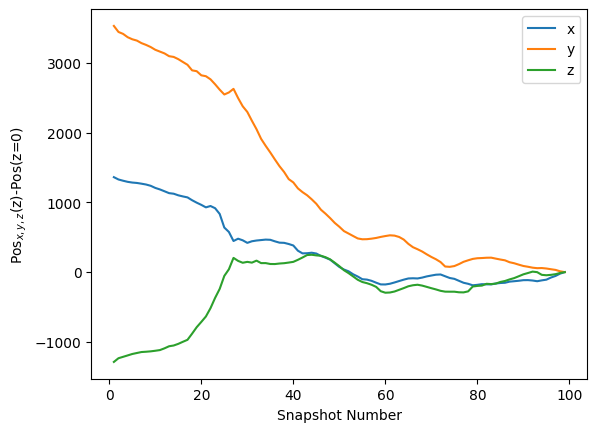

In [54]:
import matplotlib.pyplot as plt
with h5py.File("lhalotree_mpb_31342.hdf5",'r') as f:
    pos = f['SubhaloPos'][:]
    snapnum = f['SnapNum'][:]
    subid = f['SubhaloNumber'][:]

for i in range(3):
    plt.plot(snapnum,pos[:,i]-pos[0,i],label=['x','y','z'][i])

plt.legend()
plt.xlabel("Snapshot Number")
plt.ylabel('Pos$_{x,y,z}$(z)-Pos(z=0)')

plt.show()

In [55]:
url = sim['snapshots'] + "z=1/"
url

'http://www.tng-project.org/api/TNG100-1/snapshots/z=1/'

In [56]:
snap = get(url)
snap['number'],snap['redshift']

(50, 0.99729422578194)

In [57]:
i = np.where(snapnum==85)
subid[i]

array([25376])

In [58]:
sub_prog_url = "http://www.tng-project.org/api/TNG100-1/snapshots/85/subhalos/25376/"
sub_prog = get(sub_prog_url)
sub_prog['pos_x'],sub_prog['pos_y']

(10743.8, 51038.4)

In [59]:
cutout_request = {'gas':'Coordinates,Masses'}
cutout = get(sub_prog_url+"cutout.hdf5",cutout_request)

In [63]:
with h5py.File(cutout,'r') as f:
    x = f['PartType0']['Coordinates'][:,0]-sub_prog['pos_x']
    y = f['PartType0']['Coordinates'][:,1]-sub_prog['pos_y']
    dens = np.log10(f['PartType0']['Masses'][:])

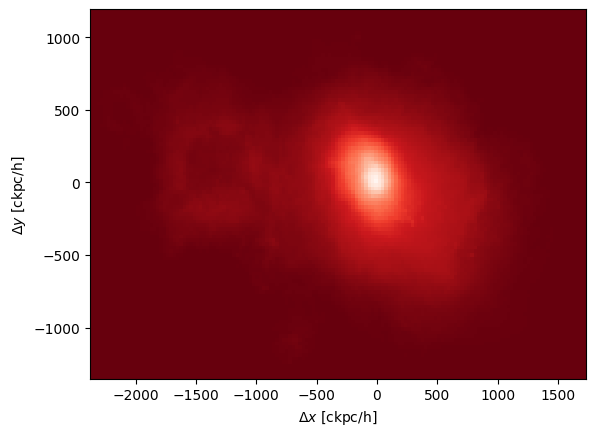

In [67]:
plt.hist2d(x,y,weights=dens,bins=[150,100],cmap="Reds")
plt.xlabel('$\Delta x$ [ckpc/h]')
plt.ylabel('$\Delta y$ [ckpc/h]')
plt.show()

In [71]:
galaxyzoo_id = 587732591714893000

snapshot_num = 99
endpoint = "https://www.tng-project.org/api/TNG100-1/snapshots/{}/subhalos/".format(snapshot_num)

response = requests.get(endpoint,headers=headers)

if response.status_code == 200:
    halo_data = response.json()
    halo = halo_data["results"][0]
    print(halo.keys())
    #for halo in halo_data:
    # if halo["galaxy_id"] == galaxyzoo_id:
    #     halo_id = halo["id"]
    #     halo_info = halo
    #     print("Halo ID: {}".format(halo_id))
    #     print("Halo info: {}".format(halo_info))

else:
    print("Request failed with status code:", response.status_code)

dict_keys(['id', 'sfr', 'mass_log_msun', 'url'])


In [72]:
print(halo)

{'id': 0, 'sfr': 2.22719, 'mass_log_msun': 14.60813834636778, 'url': 'http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/0/'}


In [80]:
# import requests

# galaxyzoo_id = "587732591714893000"
# url = "https://api.illustristng.org/api/tng100-1/subhalos/?search={}&limit=1".format(galaxyzoo_id)

# response = requests.get(url, headers=headers)
# if response.status_code == 200:
#     halo = response.json()
#     halo_id = halo[0]["id"]
# else:
#     raise Exception("Request failed with status code: {}".format(response.status_code))


---

In [8]:
import requests

baseUrl = "https://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/"

headers = {"api-key":"5484c6c24f106178fd66213717ad592d"}

In [9]:
def get(path,params=None):
    r = requests.get(path,params=params,headers=headers)

    r.raise_for_status()

    if r.headers['content-type']=='application/json':
        return r.json()

    if 'content-disposition' in r.headers:
        filename = r.headers['content-disposition'].split('filename=')[1]
        with open(filename,'wb') as f:
            f.write(r.content)
        return filename
    return r

In [13]:
r = get(baseUrl)

In [14]:
r.keys()

dict_keys(['count', 'next', 'previous', 'results'])

In [15]:
r['results']

[{'id': 0,
  'sfr': 2.22719,
  'mass_log_msun': 14.60813834636778,
  'url': 'http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/0/'},
 {'id': 1,
  'sfr': 0.413285,
  'mass_log_msun': 13.733420710710462,
  'url': 'http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/1/'},
 {'id': 2,
  'sfr': 17.3922,
  'mass_log_msun': 13.057590420489898,
  'url': 'http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/2/'},
 {'id': 3,
  'sfr': 5.07938,
  'mass_log_msun': 12.699524859399856,
  'url': 'http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/3/'},
 {'id': 4,
  'sfr': 1.41469,
  'mass_log_msun': 12.681528310672475,
  'url': 'http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/4/'},
 {'id': 5,
  'sfr': 0.886559,
  'mass_log_msun': 12.643397303528015,
  'url': 'http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/5/'},
 {'id': 6,
  'sfr': 2.18434,
  'mass_log_msun': 12.484770439405152,
  'url': 'http://www.tng-project.org/api/TNG100-1/snaps

In [16]:
newUrl = r['results'][0]['url']

In [17]:
r = get(newUrl)

In [18]:
r

{'snap': 99,
 'id': 0,
 'bhmdot': 0.00039801,
 'cm_x': 832.387,
 'cm_y': 26368.5,
 'cm_z': 18060.8,
 'gasmetallicity': 0.0077182,
 'gasmetallicityhalfrad': 0.00799488,
 'gasmetallicitymaxrad': 0.0056164,
 'gasmetallicitysfr': 0.00668848,
 'gasmetallicitysfrweighted': 0.00668008,
 'pos_x': 849.091,
 'pos_y': 26327.0,
 'pos_z': 18306.9,
 'halfmassrad': 607.966,
 'halfmassrad_gas': 627.311,
 'halfmassrad_dm': 610.31,
 'halfmassrad_stars': 47.3881,
 'halfmassrad_bhs': 0.0,
 'len': 88772413,
 'len_gas': 38648183,
 'len_dm': 46136876,
 'len_stars': 3987343,
 'len_bhs': 11,
 'mass': 27477.9,
 'mass_gas': 3900.6,
 'mass_dm': 23325.6,
 'mass_stars': 251.016,
 'mass_bhs': 0.701811,
 'massinhalfrad': 555.356,
 'massinhalfrad_gas': 13.5311,
 'massinhalfrad_dm': 415.619,
 'massinhalfrad_stars': 125.508,
 'massinhalfrad_bhs': 0.697652,
 'massinmaxrad': 7611.22,
 'massinmaxrad_gas': 870.236,
 'massinmaxrad_dm': 6518.97,
 'massinmaxrad_stars': 221.317,
 'massinmaxrad_bhs': 0.6981,
 'massinrad': 1549.8